In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
from keras.utils.np_utils import to_categorical
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def generator(
    dir,
    gen=image.ImageDataGenerator(rescale=1.0 / 255),
    shuffle=True,
    batch_size=1,
    target_size=(24, 24),
    class_mode="categorical",
):
    return gen.flow_from_directory(
        dir,
        batch_size=batch_size,
        shuffle=shuffle,
        color_mode="grayscale",
        class_mode=class_mode,
        target_size=target_size,
    )


In [ ]:
train_dir = "/content/drive/MyDrive/Dataset_update/Train_directory"
test_dir = "/content/drive/MyDrive/Dataset_update/Test_directory"

In [ ]:
BS = 32
TS = (24, 24)
train_gen = generator(train_dir, batch_size=BS, target_size=TS)
test_gen = generator(test_dir, batch_size=BS, target_size=TS)

Found 3598 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
num_classes = len(train_gen.class_indices)
svm_model = svm.SVC(kernel='linear', C=1.0, probability=True)

In [ ]:
# Prepare training data
X_train = []
y_train = []
for i in range(len(train_gen)):
    img, labels = next(train_gen)
    X_train.extend(img)
    y_train.extend(labels)
X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare test data
X_test = []
y_test = []
for i in range(len(test_gen)):
    img, labels = next(test_gen)
    X_test.extend(img)
    y_test.extend(labels)
X_test = np.array(X_test)
y_test = np.array(y_test)

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Train the SVM model
svm_model.fit(X_train.reshape(-1, 24 * 24), y_train)

# Evaluate the SVM model
y_pred = svm_model.predict(X_test.reshape(-1, 24 * 24))
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


SVM Model Accuracy: 0.8225
Confusion Matrix:
[[146  54]
 [ 17 183]]

Classification Report:
              precision    recall  f1-score   support

 Closed_Eyes       0.90      0.73      0.80       200
   Open_Eyes       0.77      0.92      0.84       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



SVM Model Accuracy: 0.8225
Confusion Matrix:
[[146  54]
 [ 17 183]]

Classification Report:
              precision    recall  f1-score   support

 Closed_Eyes       0.90      0.73      0.80       200
   Open_Eyes       0.77      0.92      0.84       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



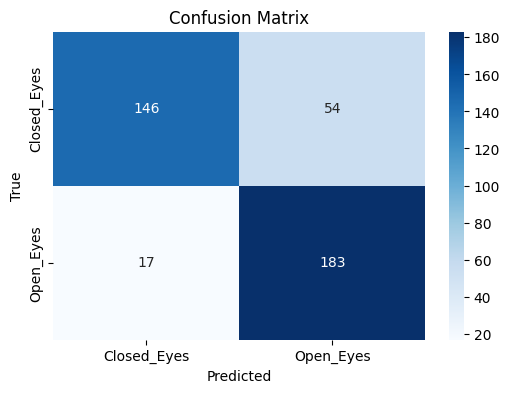

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
# Train the SVM model
svm_model.fit(X_train.reshape(-1, 24 * 24), y_train)

# Evaluate the SVM model
y_pred = svm_model.predict(X_test.reshape(-1, 24 * 24))
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model_filename = "/content/drive/MyDrive/Dataset_update/svm_model.joblib"
joblib.dump(svm_model, model_filename)

['/content/drive/MyDrive/Dataset_update/svm_model.joblib']

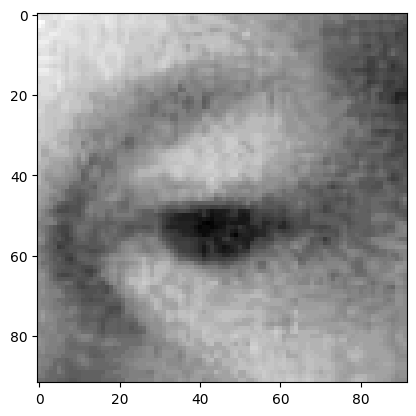

Predicted Label: Open


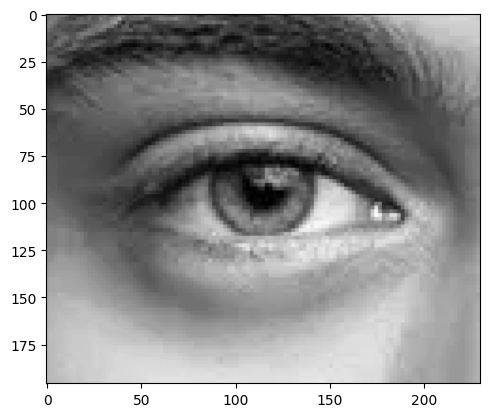

In [ ]:
import cv2
import numpy as np


image_path = '/content/drive/MyDrive/Dataset_update/Screenshot 2023-08-02 at 12.09.34 PM.png'
eye_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(eye_image ,cmap="gray")
resized_eye = cv2.resize(eye_image, (24, 24)).reshape(1, -1)
prediction = svm_model.predict(resized_eye)
predicted_label = 'Closed' if prediction == 0 else 'Open'
print("Predicted Label:", predicted_label)


Predicted Label: Closed


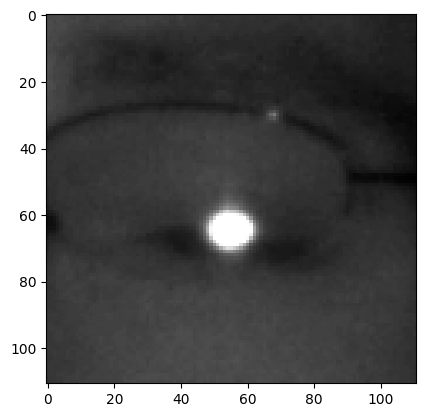

In [ ]:
import cv2
import numpy as np

image_path = '/content/drive/MyDrive/Dataset_update/Test_directory/Closed_Eyes/s0001_01798_0_1_0_2_0_01.png'
eye_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(eye_image ,cmap="gray")
resized_eye = cv2.resize(eye_image, (24, 24)).reshape(1, -1)
prediction = svm_model.predict(resized_eye)
predicted_label = 'Closed' if prediction == 0 else 'Open'
print("Predicted Label:", predicted_label)


SVM Using xg
boosting


In [ ]:
!pip install xgboost





In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Prepare training data
X_train = []
y_train = []
for i in range(len(train_gen)):
    img, labels = next(train_gen)
    X_train.extend(img)
    y_train.extend(labels)
X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare test data
X_test = []
y_test = []
for i in range(len(test_gen)):
    img, labels = next(test_gen)
    X_test.extend(img)
    y_test.extend(labels)
X_test = np.array(X_test)
y_test = np.array(y_test)

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
X_train = X_train.reshape(-1, 24 * 24)
X_test = X_test.reshape(-1, 24 * 24)

In [ ]:
# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:

y_pred = xgb_model.predict(X_test)


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Model Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


XGBoost Model Accuracy: 0.77
Confusion Matrix:
[[153  47]
 [ 45 155]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       200
           1       0.77      0.78      0.77       200

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



In [ ]:

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


xgb_model_best = xgb.XGBClassifier(**best_params)
xgb_model_best.fit(X_train, y_train)


y_pred_best = xgb_model_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("XGBoost Model Accuracy with Best Hyperparameters:", accuracy_best)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoost Model Accuracy with Best Hyperparameters: 0.7875


SVM Model Accuracy with New Threshold: 0.87
Confusion Matrix:
[[161  39]
 [ 13 187]]

Classification Report:
              precision    recall  f1-score   support

 Closed_Eyes       0.93      0.81      0.86       200
   Open_Eyes       0.83      0.94      0.88       200

    accuracy                           0.87       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



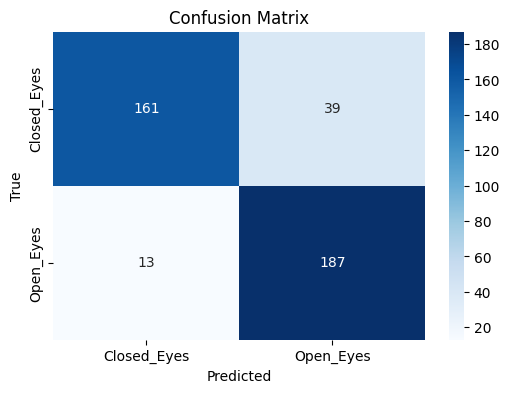

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


svm_model = SVC(probability=True)


svm_model.fit(X_train.reshape(-1, 24 * 24), y_train)

y_prob = svm_model.predict_proba(X_test.reshape(-1, 24 * 24))


new_threshold = 0.6


y_pred = (y_prob[:, 1] >= new_threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy with New Threshold:", accuracy)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


class_names = list(train_gen.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
